# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

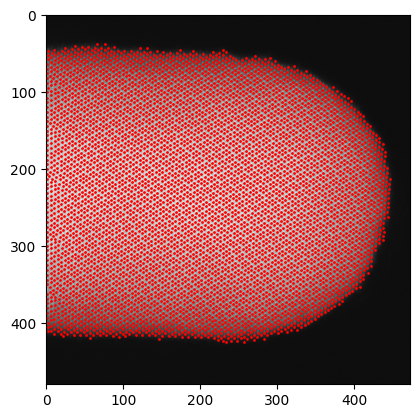

In [1]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
# file = '/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_1atoms.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/output_fivefoldsymmetry2015_121416_2.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_330_RevSTEM90_STEMdataset_802x814_3_final_60_rotated.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_O2_after_O2_and_H2_flow_1_1_conv_1_rotated.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_100_final.mat'
# file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_RT_RevSTEM90_STEMdataset_778x842_3_final_64_rotated.mat'
# file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_Aurod_+45_2016.mat'
file = '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_110_final.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
# inputStatSTEM = legacyStatSTEM['input']
# outputStatSTEM = legacyStatSTEM['output']
inputStatSTEM = legacyStatSTEM
outputStatSTEM = legacyStatSTEM
image = inputStatSTEM['obs']
dx = inputStatSTEM['dx']


# image = gaussian_filter(image, 4)

input_coordinates = inputStatSTEM['coordinates']
# output_coordinates = input_coordinates.copy()
# output_coordinates[:,0] = outputStatSTEM['BetaX']/dx 
# output_coordinates[:,1] = outputStatSTEM['BetaY']/dx

from qem.fitting import ImageModelFitting

model=ImageModelFitting(image, pixel_size=dx)

model.import_coordinates(coordinates=input_coordinates/dx)
model.remove_peaks_outside_image()
model.plot()

In [2]:
legacyStatSTEM.keys()

dict_keys(['ans', 'filename', 'pathname', 'file', 'output', 'model', 'obs', 'intensities', 'dx', 'coordinates', 'images', 'temp', 'lsq'])

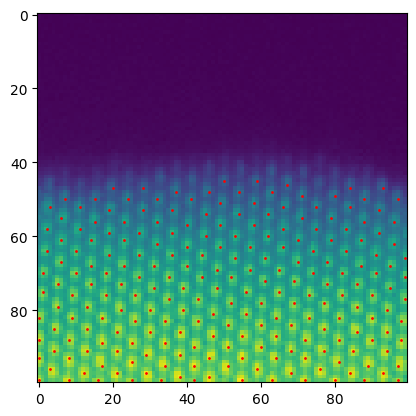

Updated peak locations.


array([[55., 99.],
       [29., 97.],
       [80., 99.],
       [38., 98.],
       [46., 98.],
       [76., 96.],
       [42., 95.],
       [84., 97.],
       [38., 92.],
       [25., 94.],
       [21., 97.],
       [34., 95.],
       [55., 93.],
       [ 8., 99.],
       [ 8., 93.],
       [85., 91.],
       [59., 96.],
       [63., 99.],
       [ 0., 99.],
       [46., 93.],
       [93., 97.],
       [34., 89.],
       [12., 97.],
       [51., 95.],
       [ 0., 88.],
       [72., 99.],
       [68., 91.],
       [ 3., 96.],
       [89., 95.],
       [68., 97.],
       [13., 91.],
       [81., 94.],
       [21., 91.],
       [47., 87.],
       [51., 90.],
       [38., 86.],
       [ 0., 93.],
       [97., 95.],
       [64., 93.],
       [72., 93.],
       [29., 92.],
       [55., 87.],
       [30., 86.],
       [17., 95.],
       [94., 86.],
       [ 4., 91.],
       [81., 88.],
       [94., 91.],
       [17., 89.],
       [98., 88.],
       [72., 88.],
       [86., 86.],
       [42.,

In [4]:
model.find_peaks(threshold_rel=0.8)

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


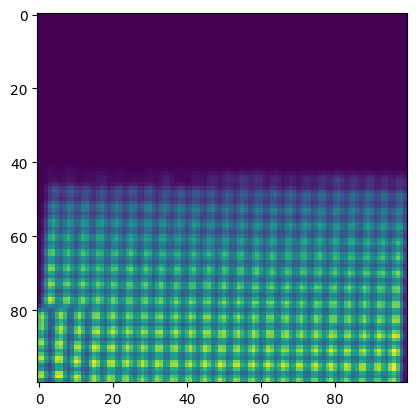

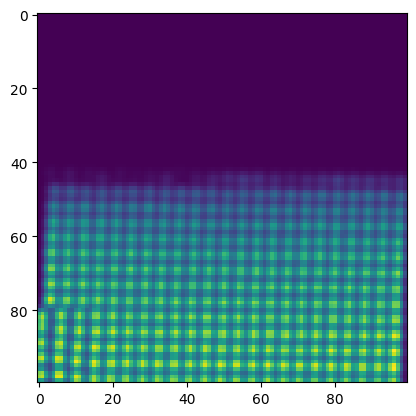

In [2]:
model.fit_local = True
model.fit_background = True
# model.refine_center_of_mass()
# model.fit_global(maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)
params = model.init_params()
model.update_params(params)
model.model = model.predict_local(params)
plt.imshow(model.model)
params = model.linear_estimator(params)
model.update_params(params)
model.model = model.predict_local(params)
plt.imshow(model.model)
model.model = model.predict(params,model.X,model.Y)
model.plot('')
plt.imshow(model.model)

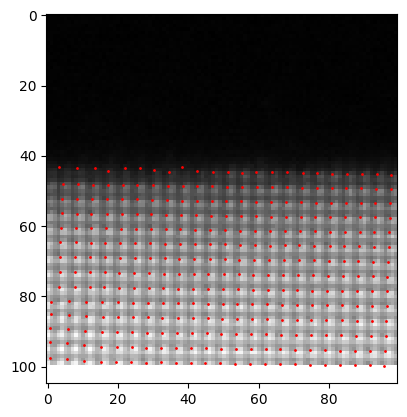

In [4]:
model.plot()

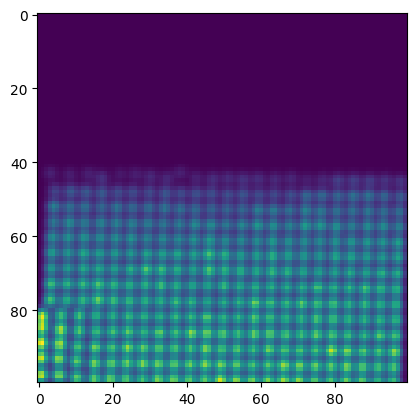

In [4]:
params = model.init_params()
model.model = model.predict(params,model.X,model.Y)
plt.imshow(model.model)

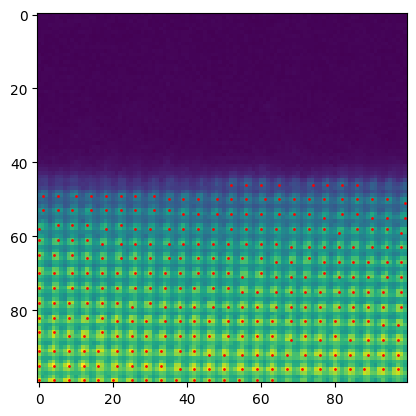

Updated peak locations.


array([[ 4., 95.],
       [12., 95.],
       [ 8., 95.],
       [ 0., 91.],
       [46., 96.],
       [50., 96.],
       [ 8., 91.],
       [42., 96.],
       [80., 96.],
       [12., 91.],
       [ 8., 99.],
       [25., 91.],
       [55., 96.],
       [59., 96.],
       [71., 96.],
       [20., 99.],
       [12., 99.],
       [25., 95.],
       [ 0., 86.],
       [97., 92.],
       [97., 96.],
       [ 4., 99.],
       [80., 92.],
       [67., 96.],
       [89., 88.],
       [21., 91.],
       [93., 88.],
       [ 0., 95.],
       [29., 95.],
       [63., 96.],
       [76., 96.],
       [ 4., 91.],
       [84., 96.],
       [84., 92.],
       [29., 91.],
       [ 0., 99.],
       [16., 91.],
       [16., 95.],
       [ 4., 86.],
       [16., 99.],
       [59., 87.],
       [55., 83.],
       [59., 92.],
       [42., 91.],
       [33., 95.],
       [21., 95.],
       [63., 92.],
       [93., 92.],
       [76., 88.],
       [46., 92.],
       [88., 96.],
       [89., 92.],
       [93.,

In [24]:
model.find_peaks(threshold_rel=0.7)

In [2]:
model.coordinates.max()

99.71457806204008

In [ ]:
# model.fit_background = True
# model.refine_center_of_mass()
# model.fit_global(maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)
# model.remove_peaks_outside_image()
params = model.init_params()
# params = model.fit_patch(params, patch_size = 300,buffer_size =40, step_size=1e-2, maxiter=100, tol=1e-3,plot=True, stride_size=300)
params = model.fit_patch(params, patch_size = 100,buffer_size =0, step_size=1e-1, maxiter=10000, tol=1e-4,plot=True, mode='random',num_random_patches=10)

In [2]:
params = model.init_params(atom_size=0.4)
params = model.fit_global(params, maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


INFO: jaxopt.OptaxSolver: Iter: 1 Gradient Norm (stop. crit.): 106.3850326538086 Objective Value:4022.70654296875 
INFO: jaxopt.OptaxSolver: Iter: 2 Gradient Norm (stop. crit.): 115.00663757324219 Objective Value:3093.9990234375 
INFO: jaxopt.OptaxSolver: Iter: 3 Gradient Norm (stop. crit.): 122.02449798583984 Objective Value:2088.35302734375 
INFO: jaxopt.OptaxSolver: Iter: 4 Gradient Norm (stop. crit.): 113.4705810546875 Objective Value:1093.2078857421875 
INFO: jaxopt.OptaxSolver: Iter: 5 Gradient Norm (stop. crit.): 67.01770782470703 Objective Value:671.084716796875 
INFO: jaxopt.OptaxSolver: Iter: 6 Gradient Norm (stop. crit.): 136.8955078125 Objective Value:1233.99462890625 
INFO: jaxopt.OptaxSolver: Iter: 7 Gradient Norm (stop. crit.): 143.82069396972656 Objective Value:1523.76025390625 
INFO: jaxopt.OptaxSolver: Iter: 8 Gradient Norm (stop. crit.): 142.99415588378906 Objective Value:1478.811767578125 
INFO: jaxopt.OptaxSolver: Iter: 9 Gradient Norm (stop. crit.): 136.1779479980

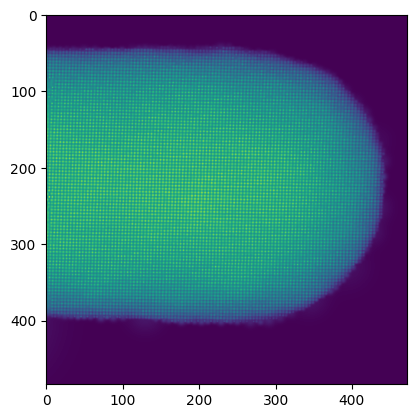

In [3]:
plt.imshow(model.model)

In [ ]:
model.fit_local = True
model.fit_background = True
model.model = 'gaussian'
# model.refine_center_of_mass()
# model.fit_global(maxiter=1000, tol=1e-4, step_size = 1e-1, verbose=True)
params = model.init_params(atom_size=0.4)
# params = model.linear_estimator(params)
params = model.fit_random_batch(params, batch_size= 1000, maxiter=1000, tol=1e-3, step_size=1e-2, verbose=False, plot=True, num_epoch = 5)
# params = model.linear_estimator(params)
# model.prediction = model.predict_local(params)
# model.update_params(params)

In [8]:
params = model.linear_estimator(params)
model.prediction = model.predict_local(params)

/tmp/ipykernel_153404/3681904157.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


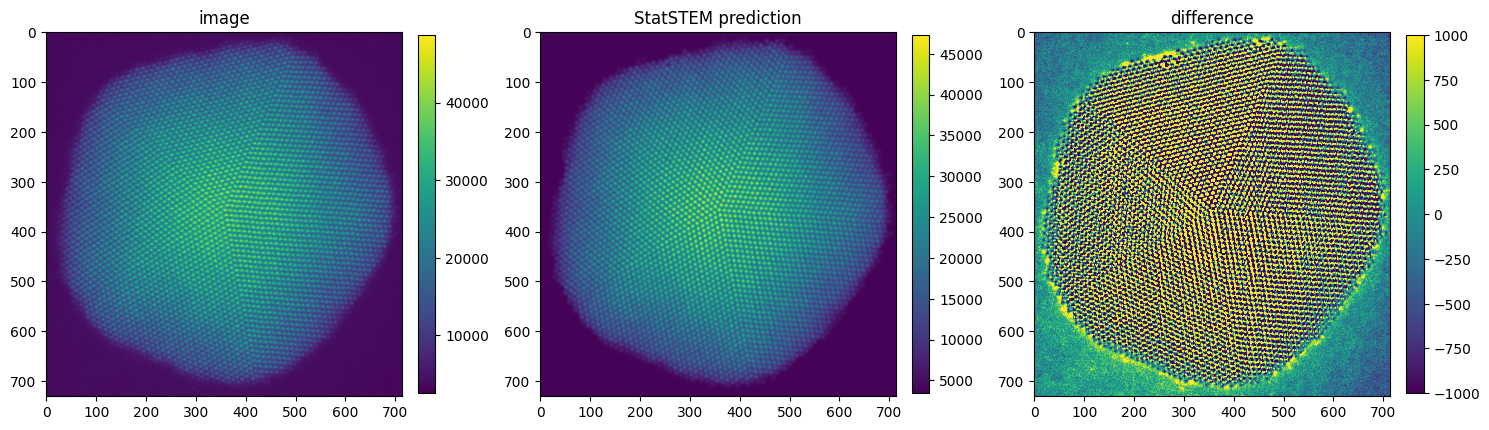

In [7]:
# outputStatSTEM=outputStatSTEM['output']
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
image = inputStatSTEM['obs']
im = plt.imshow( image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(image.min(),image.max())
plt.title('image')
plt.subplot(1,3,2)
im = plt.imshow( outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(image.min(),image.max())
plt.title('StatSTEM prediction')
plt.subplot(1,3,3)
im = plt.imshow( image - outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(-1000,1000)
plt.title('difference')
plt.tight_layout()

/tmp/ipykernel_29654/3866741071.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


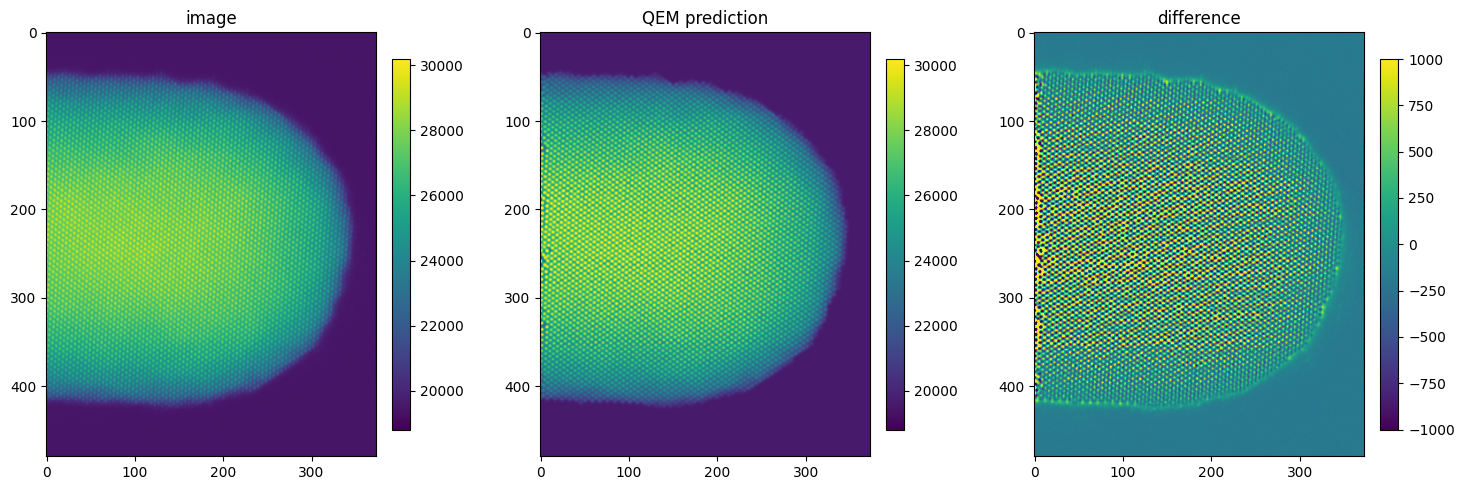

In [6]:
# %matplotlib qt5
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
im = plt.imshow( model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim(model.image.min(),model.image.max())
plt.title('image')
plt.subplot(1,3,2)
im = plt.imshow(model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.title('QEM prediction')
plt.subplot(1,3,3)
im = plt.imshow( model.image - model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.title('difference')
plt.tight_layout()
plt.clim(-1000,1000)

In [39]:
params['background'] = outputStatSTEM['zeta']
params['height'] = outputStatSTEM['eta']
params['pos_y'] = outputStatSTEM['coordinates'][:,1]/dx 
params['pos_x'] = outputStatSTEM['coordinates'][:,0]/dx 
params['sigma'] = outputStatSTEM['rho']/dx
params = model.linear_estimator(params)
model.update_params(params)
model.prediction = model.predict_local(params)

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
refined_coordinates = model.pos_x, model.pos_y
volume = model.volume
im = plt.scatter(refined_coordinates[0], refined_coordinates[1], c=volume, s=100)
# make aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'patch refined scs ($\AA^2$)')
plt.tight_layout()
plt.subplot(1,3,2)
volumes = outputStatSTEM['output']['Volumes']
coord_statstem = outputStatSTEM['coordinates']
# coord_statstem = np.array([outputStatSTEM['BetaX']/dx, outputStatSTEM['BetaY']/dx]).T
im = plt.scatter(coord_statstem[:,0], coord_statstem[:,1], c=volumes, s=100)
# threshold = 1.7e5
plt.clim(model.volume.min(),model.volume.max())
# make aspect ratio equal
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'Matlab StatSTEM refined scs ($\AA^2$)')
plt.tight_layout()

plt.subplot(1,3,3)
im = plt.scatter(model.pos_x, model.pos_y, c=outputStatSTEM['volumes']-model.volume, s=100)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title(r'difference refined scs ($\AA^2$)')
plt.clim(-2e3,2e3)

In [17]:
((outputStatSTEM['volumes']-model.volume)/model.volume).mean()

0.004370225189251263

Text(0.5, 1.0, 'Residuals')

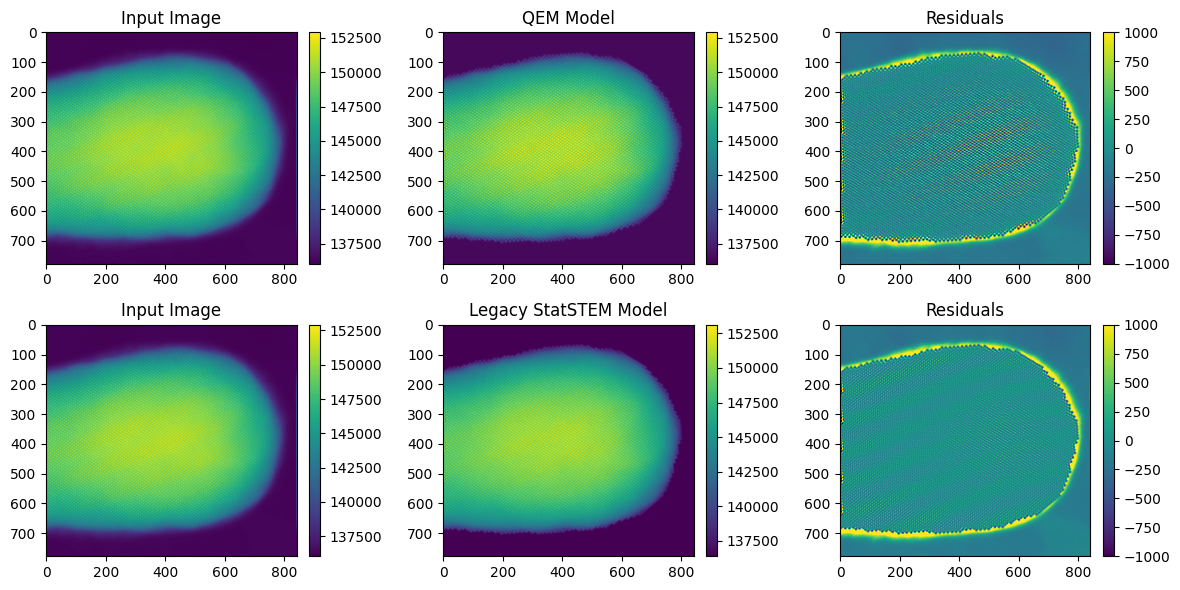

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

In [12]:
%matplotlib qt5
input_coordinates = model.coordinates
output_coordinates = outputStatSTEM['coordinates']/dx
# output_coordinates = np.array([outputStatSTEM['BetaX']/dx, outputStatSTEM['BetaY']/dx]).T
plt.scatter(input_coordinates[:,0], input_coordinates[:,1], c='r',s=100,alpha=0.5)
plt.scatter(model.pos_x/dx, model.pos_y/dx, c='b', marker='x')
plt.scatter(output_coordinates[:,0], output_coordinates[:,1], c='y', marker='x')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['input coordinates', 'QEM refined coordinates', 'StatSTEM refined coordinates'])


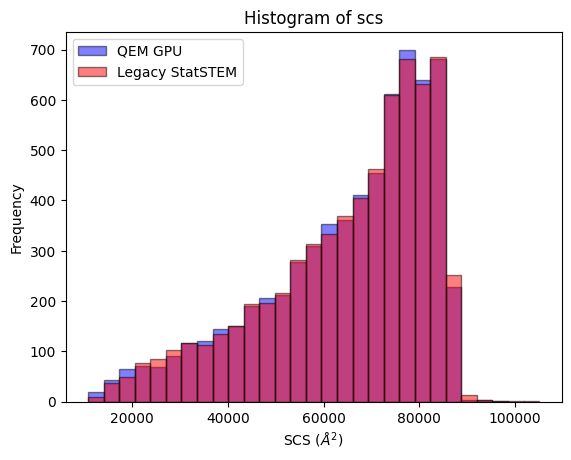

In [13]:
data1= model.volume

data2= outputStatSTEM['volumes']
mask = (data2>0) & (data2<1e6)
data2 = data2[mask]
combined_data = np.concatenate((data1, data2))
min_bin = combined_data.min()
max_bin = combined_data.max()

# Define the bin edges so that both histograms will use the same bins
bins = np.linspace(min_bin, max_bin, 30)

plt.hist(data1, bins=bins, edgecolor='black',label='QEM GPU',color='blue',alpha=0.5)
plt.hist(data2, bins=bins, edgecolor='black',color='red',alpha=0.5, label='Legacy StatSTEM')
# ground_truth = np.sum(image)*dx**2/64
#plot ground truth as a vertical line in red 
# plt.plot([ground_truth,ground_truth],[0,20],'r--',label='Ground truth')
plt.title('Histogram of scs')
plt.xlabel(r'SCS ($\AA^2$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [36]:
import numpy as np
from scipy.ndimage import uniform_filter, gaussian_filter

def ssim(img1, img2, C1=6.5025, C2=58.5225):
    """
    Calculate the SSIM (Structural Similarity Index) between two images.
    
    Parameters:
    - img1, img2: Numpy arrays of the same dimension.
    - C1, C2: Variables to stabilize the division with weak denominator.
    
    Returns:
    - The SSIM index.
    """
    
    # Ensure the input images have the same dimensions
    assert img1.shape == img2.shape, "Input images must have the same dimensions"
    
    # Mean of the images
    mu1 = uniform_filter(img1, size=11)
    mu2 = uniform_filter(img2, size=11)
    
    # Variance of the images
    sigma1_sq = uniform_filter(img1 * img1, size=11) - mu1 * mu1
    sigma2_sq = uniform_filter(img2 * img2, size=11) - mu2 * mu2
    
    # Covariance between the images
    sigma12 = uniform_filter(img1 * img2, size=11) - mu1 * mu2
    
    # Calculate the SSIM
    ssim_map = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / ((mu1**2 + mu2**2 + C1) * (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

ssim(model.image , outputStatSTEM['model']),ssim(model.image , model.prediction)

(-0.6673563390645052, -0.80695873)

In [ ]:
diff.std(), np.abs(diff).mean()

(Array(2263.3901, dtype=float32), 1607.2849)

In [16]:
diff = model.image - model.prediction
diff = model.image - outputStatSTEM['model']
plt.imshow(diff)
# binning the data into half the size
bin_size = 10
arr = diff
arr = arr[:arr.shape[0]//bin_size*bin_size,:arr.shape[1]//bin_size*bin_size]
arr = arr.reshape(arr.shape[0]//bin_size,bin_size,arr.shape[1]//bin_size,bin_size).mean(axis=1).mean(axis=2)
plt.imshow(arr)
arr.std() + np.abs(arr).mean(), diff.std() +np.abs(diff).mean()
# get the L1 loss of the arr and diff
# np.abs(arr).mean(), np.abs(diff).mean()
arr.std() , diff.std() 


(157.4079216389822, 337.3651329653982)

In [27]:
params =model.fit_global(params)
model.update_params(params)

In [26]:
model.sigma, outputStatSTEM['rho']

(array([0.90314483, 0.90314483, 0.90314483, ..., 0.90314483, 0.90314483,
        0.90314483]),
 array([1.04332908, 1.04332908, 1.04332908, ..., 1.04332908, 1.04332908,
        1.04332908]))